In [27]:
# ***** ATTENTION! *****
# If you want that the "%matplotlib widget" works, you need the package ipympl (pip install ipympl)
#
#
# MATPLOTLIB INTERACTIVE VISUALIZATION. REMOVE (OR COMMENT) IF YOU NEED TO PRINT THE NOTEBOOK AS A PDF, SOMETIMES IT DOES NOT WORK WELL...
%matplotlib widget


import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.lines import Line2D
import yaml #loading dictionary
from IPython.display import display  # to display variables in a "nice" way

try:
    from yaml import CLoader as Loader, CDumper as Dumper
except ImportError:
    from yaml import Loader, Dumper

# pd.options.display.max_rows = 9999
pd.options.display.max_columns = 20

In [28]:
response_df= pd.read_csv("datasets/responses_hw.csv", na_values=["", " "])
columns_df = pd.read_csv("datasets/columns_hw.csv")

response_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to Home Type
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


In [29]:
response_df.dropna(inplace=True,axis=0)
response_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 674 entries, 0 to 1009
Columns: 150 entries, Music to Home Type
dtypes: float64(134), int64(5), object(11)
memory usage: 795.1+ KB


Let's check if we can delete all the rows with a NaN value.

array(['drink a lot', 'social drinker', 'never', nan], dtype=object)
array(['never smoked', 'tried smoking', 'former smoker', 'current smoker',
       nan], dtype=object)

In [30]:
# response_df_firsts = response_df.columns.to_list()[0:-10]

# Smoking= {"never smoked":1, "tried smoking":2, "former smoker":3, "current smoker":5}
# Alcohol= {"never":1, "social drinker":3, "drink a lot":5}
# Punctuality= {"late":1, "on time":3, "early":5}
# Lying= {"never":1,"only to avoid hurting someone":2, "sometimes":3, "everytime it suits me":5}
# Internt_Usage= {"no time at all":1,"less than an hour a day":2, "few hours a day":3, "most of the day":5}

# for i in response_df_firsts:
#     if not isinstance(response_df[i].values[0], np.number):
#         for j in response_df_firsts[i]:
#             print(j)
        

In [31]:
min=MinMaxScaler(feature_range=(1,5))
response_df_firsts=response_df[:-10]
for i in response_df_firsts.columns.to_list():
    if not isinstance(response_df_firsts[i].values[0], np.number):
        valori = response_df_firsts[i].unique()
        trans=np.round(min.fit_transform(np.array(range(len(response_df_firsts[i].dropna().unique()))).reshape(-1,1))).flatten().tolist()
        
        ## if we don't use .dropna
        # if any(pd.isna(val) for val in valori):
        #     trans.append(0)
        print(valori, trans)
        serie = {k:v for k, v in zip(valori, trans)}
        response_df_firsts[i] = pd.Series([serie[el] for el in response_df_firsts[i].values])
response_df_firsts.fillna(-1, inplace=True)

['never smoked' 'tried smoking' 'current smoker' 'former smoker'] [1.0, 2.0, 4.0, 5.0]
['drink a lot' 'social drinker' 'never'] [1.0, 3.0, 5.0]
['on time' 'early' 'late'] [1.0, 3.0, 5.0]
['never' 'sometimes' 'everytime it suits me'
 'only to avoid hurting someone'] [1.0, 2.0, 4.0, 5.0]
['few hours a day' 'less than an hour a day' 'most of the day'] [1.0, 3.0, 5.0]
['female' 'male'] [1.0, 5.0]
['right' 'left'] [1.0, 5.0]
['college/bachelor degree' 'secondary school' 'primary school'
 'masters degree' 'doctorate degree' 'currently a primary school pupil'] [1.0, 2.0, 3.0, 3.0, 4.0, 5.0]
['no' 'yes'] [1.0, 5.0]
['village' 'city'] [1.0, 5.0]
['block of flats' 'house/bungalow'] [1.0, 5.0]


C:\Users\Claudio\AppData\Local\Temp\ipykernel_13016\3045010308.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_df_firsts[i] = pd.Series([serie[el] for el in response_df_firsts[i].values])
C:\Users\Claudio\AppData\Local\Temp\ipykernel_13016\3045010308.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_df_firsts[i] = pd.Series([serie[el] for el in response_df_firsts[i].values])
C:\Users\Claudio\AppData\Local\Temp\ipykernel_13016\3045010308.py:13: SettingWithCopyWarning: 
A value is tr

In [32]:
response_df.to_csv("datasets/output.csv")

In [33]:
type(response_df["Smoking"])

pandas.core.series.Series

In [34]:
response_df.isna().sum(axis=0)

Music                       0
Slow songs or fast songs    0
Dance                       0
Folk                        0
Country                     0
                           ..
Hand                        0
Education                   0
Only child                  0
Home Town Type              0
Home Type                   0
Length: 150, dtype: int64

In [35]:
response_df.info(), columns_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 674 entries, 0 to 1009
Columns: 150 entries, Music to Home Type
dtypes: float64(134), int64(5), object(11)
memory usage: 795.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   original  150 non-null    object
 1   short     150 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


(None, None)

In [36]:
# split the main dataset


col =response_df.columns.to_list()
entertainment= col[0:63]
personality= col[63:63+77]
demographics = col[63+77: 63+77+10]

entertainment_df=response_df[entertainment]
personality_df=response_df[personality]
demographics_df=response_df[demographics]


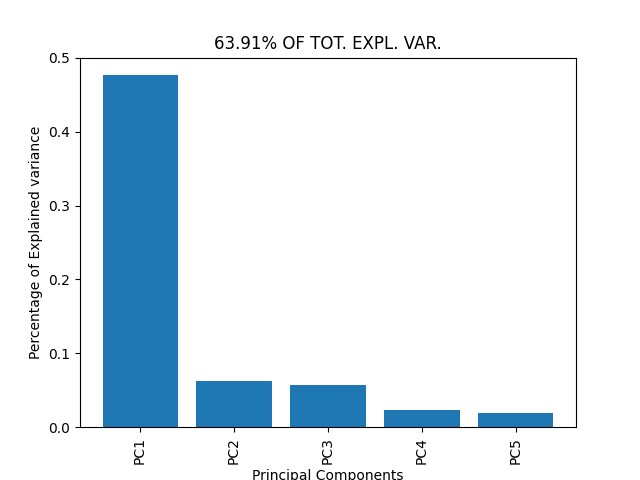

In [37]:
m=5
pca= PCA(n_components=m)
pca.fit(response_df_firsts.values)

round_expl_var_ratio = np.round(pca.explained_variance_ratio_.sum()*100,decimals=2)  # <-- TODO!!

plt.figure()
plt.bar(range(1,m+1), pca.explained_variance_ratio_)
plt.title(f"{round_expl_var_ratio}% OF TOT. EXPL. VAR.")
plt.xticks(ticks=np.arange(1,m+1), 
           labels=[f"PC{i}" for i in range(1,m+1)],
           rotation=90)
plt.xlabel("Principal Components")
plt.ylabel("Percentage of Explained variance")
plt.show()


In [38]:
pca.explained_variance_ratio_

array([0.47660053, 0.06288671, 0.05772302, 0.02294004, 0.01894287])

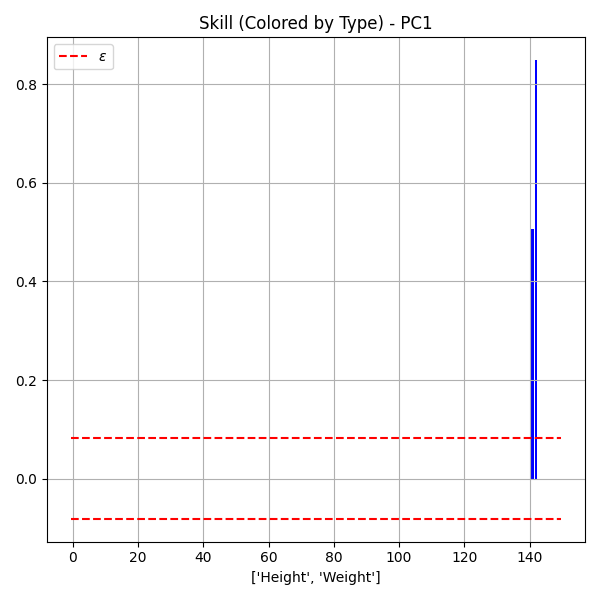

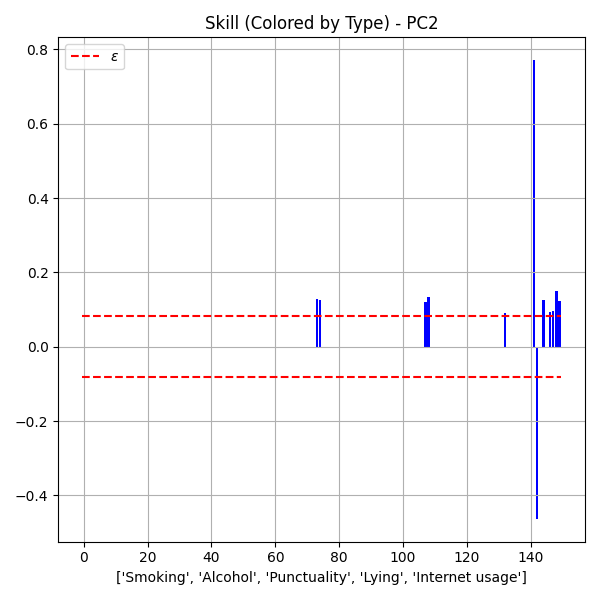

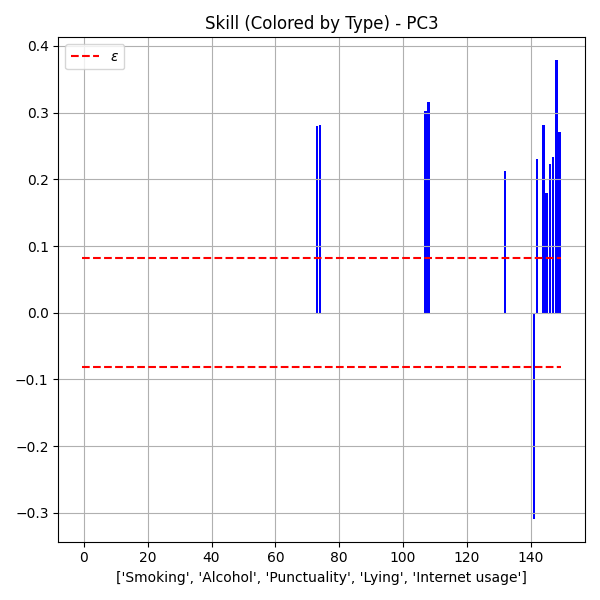

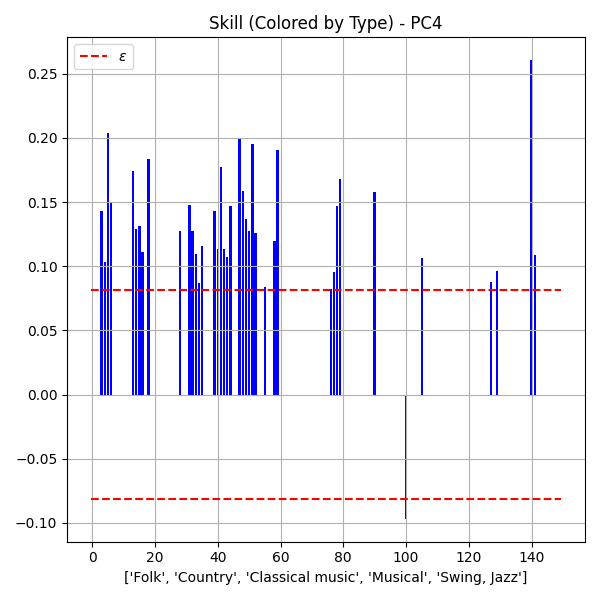

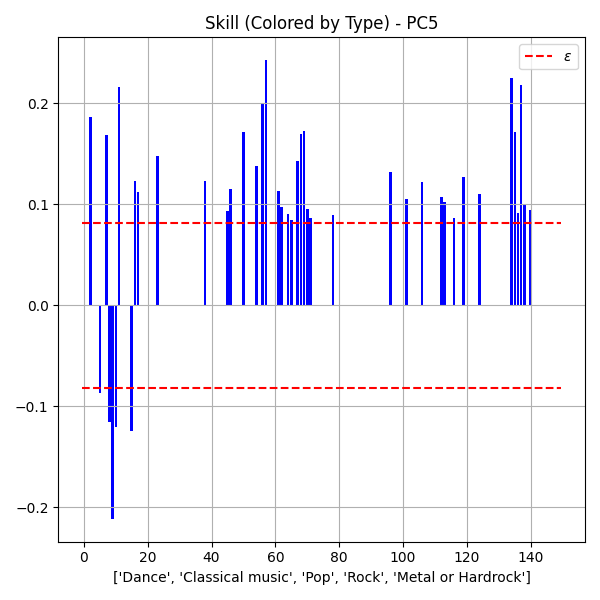

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Calcolo di epsilon
eps = np.sqrt(1 / pca.n_features_in_)

# Lista delle colonne
cols = response_df_firsts.columns.to_list()

# Ciclo per ogni componente principale
for ii in range(m):
    # Indici di componenti maggiori o uguali a epsilon (positivo e negativo)
    ind_great_pos_PCii = np.where(pca.components_[ii, :] >= eps)[0]
    ind_great_neg_PCii = np.where(pca.components_[ii, :] <= -eps)[0]
    ind_significant = np.union1d(ind_great_pos_PCii, ind_great_neg_PCii)  # Unione degli indici

    # Estrarre i label significativi
    significant_labels = [cols[idx] for idx in ind_significant]
    significant_values = pca.components_[ii, ind_significant]

    # Creazione del barplot
    plt.figure(figsize=(6, 6))
    plt.bar(ind_significant, significant_values, color='blue')
    plt.plot([-0.5, len(cols) - 0.5], [eps, eps], "red", linestyle="--", label=r"$\epsilon$")
    plt.plot([-0.5, len(cols) - 0.5], [-eps, -eps], "red", linestyle="--")
    plt.xlabel(significant_labels[0:5])
    plt.title(f"Skill (Colored by Type) - PC{ii + 1}")
    plt.grid()
    plt.tight_layout()
    plt.legend()
    plt.show()
